In [652]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import decimal

ModuleNotFoundError: No module named 'plotly'

In [631]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [632]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [633]:
df = df.rename(columns={0:"sepal length (cm)", 1:"sepal width (cm)", 2:"petal length (cm)", 3:"petal width(cm)", 4:"class"})
df.columns = df.columns.str.replace(' ', '_')

In [634]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [635]:
features = df.columns[0:len(df.columns)-1]
for f in features:
    print(f)

sepal_length_(cm)
sepal_width_(cm)
petal_length_(cm)
petal_width(cm)


### To get all 6 possible combinations with the two features, we will use itertools.combinations function

In [636]:
#get combinations of all features
def getFeatureCombination(features):
    feature_combination = list()
    
    feature_combination+=(list(combinations(features, 2)))    
    return feature_combination

ans = getFeatureCombination(features)
for a in ans:
    print(list(a))

['sepal_length_(cm)', 'sepal_width_(cm)']
['sepal_length_(cm)', 'petal_length_(cm)']
['sepal_length_(cm)', 'petal_width(cm)']
['sepal_width_(cm)', 'petal_length_(cm)']
['sepal_width_(cm)', 'petal_width(cm)']
['petal_length_(cm)', 'petal_width(cm)']


In [637]:
answer_dict = {
    "Model Type": ['AB', 'AC', 'AD', 'BC', 'BD', 'CD'],
    "SGD Classifier":[],
    "Logistic Regression":[],
    "SVM- Linear":[],
    "SVM- Polynomial":[],
    "SVM- RBF":[]
}

## Stochastic Gradient Descent

In [638]:
def train_sgd(X_train, y_train):
    sgd_model = SGDClassifier(loss='modified_huber', learning_rate='optimal', eta0=0.01, random_state=30)
    sgd_model.fit(X_train,y_train)
    accuracy = round(sgd_model.score(X_train, y_train),2)
    answer_dict['SGD Classifier'].append(accuracy)

## Logistic Regression

In [639]:
def train_logistic(X_train, y_train):
    logisticRegr_model = LogisticRegression(random_state=30)
    logisticRegr_model.fit(X_train,y_train)
    accuracy = round(logisticRegr_model.score(X_train, y_train),2)
    answer_dict['Logistic Regression'].append(accuracy)

## SVM

In [640]:
def train_SVM_kernel(X_train, y_train, sel_kernel, dict_key):
    SVM_model = SVC(kernel=sel_kernel, random_state=30)
    SVM_model.fit(X_train, y_train)
    accuracy = round(SVM_model.score(X_train, y_train),2)
    answer_dict[dict_key].append(accuracy)

In [641]:
kernels = ['linear', 'poly', 'rbf']
def train_svm(X_train, y_train):
    train_SVM_kernel(X_train, y_train, 'linear',"SVM- Linear")
    train_SVM_kernel(X_train, y_train, 'poly',"SVM- Polynomial")
    train_SVM_kernel(X_train, y_train, 'rbf', "SVM- RBF")

# Run all the models

In [642]:
selected_features = []    #selecting specific features for tranning 
feature_combination = getFeatureCombination(features) #all 6 combinations of the features

for ith_comb_feat in range(len(feature_combination)):
    selected_features = list(feature_combination[ith_comb_feat])
    X_train = df[selected_features]
    y_train = df['class']
    
    train_sgd(X_train, y_train)
    train_logistic(X_train, y_train)
    train_svm(X_train, y_train)

In [643]:
answer_dict

{'Model Type': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD'],
 'SGD Classifier': [0.67, 0.85, 0.72, 0.95, 0.86, 0.77],
 'Logistic Regression': [0.82, 0.96, 0.96, 0.95, 0.96, 0.97],
 'SVM- Linear': [0.82, 0.95, 0.96, 0.96, 0.96, 0.97],
 'SVM- Polynomial': [0.81, 0.96, 0.95, 0.95, 0.96, 0.97],
 'SVM- RBF': [0.82, 0.96, 0.96, 0.95, 0.96, 0.95]}

In [644]:
df_30_info = pd.DataFrame(columns=["Model Type",'AB', 'AC', 'AD', 'BC', 'BD', 'CD'])
for key in list(answer_dict.keys())[1:]:
    insert_row = [key]
    insert_row.extend(answer_dict[key])
    df_30_info.loc[len(df_30_info)] = insert_row

In [645]:
df_30_info

,Model Type,AB,AC,AD,BC,BD,CD
0,SGD Classifier,0.67,0.85,0.72,0.95,0.86,0.77
1,Logistic Regression,0.82,0.96,0.96,0.95,0.96,0.97
2,SVM- Linear,0.82,0.95,0.96,0.96,0.96,0.97
3,SVM- Polynomial,0.81,0.96,0.95,0.95,0.96,0.97
4,SVM- RBF,0.82,0.96,0.96,0.95,0.96,0.95


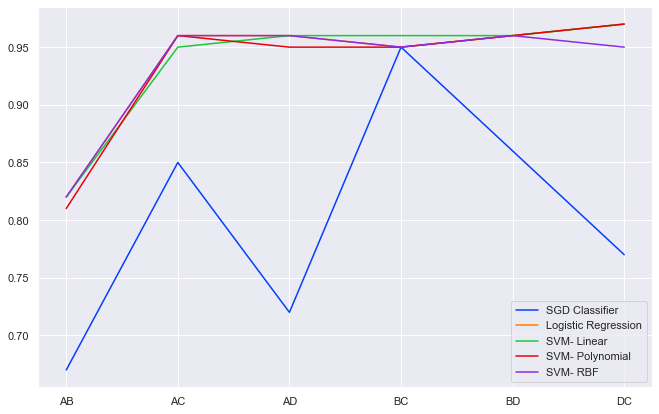

In [646]:
sns.set(rc={'figure.figsize':(11,7)})
sns.set_palette("bright")
df_30_info_temp = df_30_info
df_30_info_temp = df_30_info.drop('Model Type', axis=1)
labels= ["SGD Classifier", "Logistic Regression", "SVM- Linear", "SVM- Polynomial", "SVM- RBF"]
x_dat = ['AB', 'AC', 'AD', 'BC', 'BD', 'DC']

for i in range(len(labels)):
    y_dat = list(df_30_info_temp.iloc[i])
    ax = sns.lineplot(x=x_dat, y=y_dat, label=labels[i])


### Comparing the mean values

In [648]:
df_30_info['Mean_Model'] = round(df_30_info.mean(axis=1, numeric_only=True),2)
df_30_info[['Model Type', 'Mean_Model']]

,Model Type,Mean_Model
0,SGD Classifier,0.80
1,Logistic Regression,0.94
2,SVM- Linear,0.94
3,SVM- Polynomial,0.93
4,SVM- RBF,0.93


In [649]:
df_30_info

,Model Type,AB,AC,AD,BC,BD,CD,Mean_Model
0,SGD Classifier,0.67,0.85,0.72,0.95,0.86,0.77,0.80
1,Logistic Regression,0.82,0.96,0.96,0.95,0.96,0.97,0.94
2,SVM- Linear,0.82,0.95,0.96,0.96,0.96,0.97,0.94
3,SVM- Polynomial,0.81,0.96,0.95,0.95,0.96,0.97,0.93
4,SVM- RBF,0.82,0.96,0.96,0.95,0.96,0.95,0.93


In [650]:
info = ["Mean_features"]
info.extend(list(round(df_30_info[df_30_info.columns[1:]].mean(),2)))
df_30_info.loc[len(df_30_info)] = info

df_30_info

,Model Type,AB,AC,AD,BC,BD,CD,Mean_Model
0,SGD Classifier,0.67,0.85,0.72,0.95,0.86,0.77,0.80
1,Logistic Regression,0.82,0.96,0.96,0.95,0.96,0.97,0.94
2,SVM- Linear,0.82,0.95,0.96,0.96,0.96,0.97,0.94
3,SVM- Polynomial,0.81,0.96,0.95,0.95,0.96,0.97,0.93
4,SVM- RBF,0.82,0.96,0.96,0.95,0.96,0.95,0.93
5,Mean_features,0.79,0.94,0.91,0.95,0.94,0.93,0.91


# Margin Draw

In [ ]:
SVM_model = SVC(kernel='linear')
X_train = df[['petal_length_(cm)', 'petal_width(cm)']]
SVM_model.fit(X_train, y_train)
SVM_model.score(X_train, y_train)

In [ ]:
#==============================================

In [ ]:
new = df_30_info.T
list_index = new.index
new = new.reset_index(drop=True)

In [ ]:
#df_30_info = df_30_info.drop('Model Type', axis=1)

In [ ]:
#ax = sns.lineplot(data=df_30_info, x=df_30_info.index, y=df[0])

In [651]:
sns.set(rc={'figure.figsize':(11,7)})
sns.set_palette("bright")

df_30_info_temp = df_30_info
df_30_info_temp = df_30_info.drop('Model Type', axis=1)
x_dat = ['AB', 'AC', 'AD', 'BC', 'BD', 'DC']
y_dat1 = list(df_30_info_temp.iloc[0])
y_dat2 = list(df_30_info_temp.iloc[1])
y_dat3 = list(df_30_info_temp.iloc[2])
y_dat4 = list(df_30_info_temp.iloc[3])
y_dat5 = list(df_30_info_temp.iloc[4])

ax = sns.lineplot(x=x_dat, y=y_dat1, label="SGD Classifier")
ax = sns.lineplot(x=x_dat, y=y_dat2, label="Logistic Regression")
ax = sns.lineplot(x=x_dat, y=y_dat3, label="SVM- Linear")
ax = sns.lineplot(x=x_dat, y=y_dat4, label="SVM- Polynomial")
ax = sns.lineplot(x=x_dat, y=y_dat5, label="SVM- RBF")

ValueError: All arrays must be of the same length